In [28]:
#importación de librerias
import os
import pandas as pd
#libreria para graficar
import matplotlib.pyplot as plt
import numpy as np;
import scipy.signal as signal;
import scipy.io as sio;
import numpy as np;
import math
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro , levene, mannwhitneyu

In [84]:
# Crear un DataFrame vacío para almacenar los datos
df_all = pd.DataFrame()

# Leer los archivos modificados y agregarlos al DataFrame
for registro in range(1, 11):  # Rango de registros del 1 al 10
    registro_folder = os.path.join('RegistrosCon', str(registro))
    archivo_modificado = os.path.join(registro_folder, 'datos_modificados.txt')
    df_registro = pd.read_csv(archivo_modificado, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)
    df_registro['sujeto'] = registro  # Asignar el número de sujeto
    df_all = pd.concat([df_all, df_registro], ignore_index=True)

# Reordenar las columnas para que coincidan con tu descripción
df_all = df_all[['tiempo', 'EMG', 'sujeto']]

C:\Users\ORMAN\AppData\Local\Temp\ipykernel_43548\2275795261.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_registro = pd.read_csv(archivo_modificado, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_43548\2275795261.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_registro = pd.read_csv(archivo_modificado, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_43548\2275795261.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_registro = pd.read_csv(archivo_modificado, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_43548\22757

In [85]:
df_all

,tiempo,EMG,sujeto
0,1,5.0,1
1,2,306.0,1
2,3,304.0,1
3,4,303.0,1
4,5,305.0,1
...,...,...,...
9995,996,312.0,10
9996,997,309.0,10
9997,998,314.0,10
9998,999,292.0,10


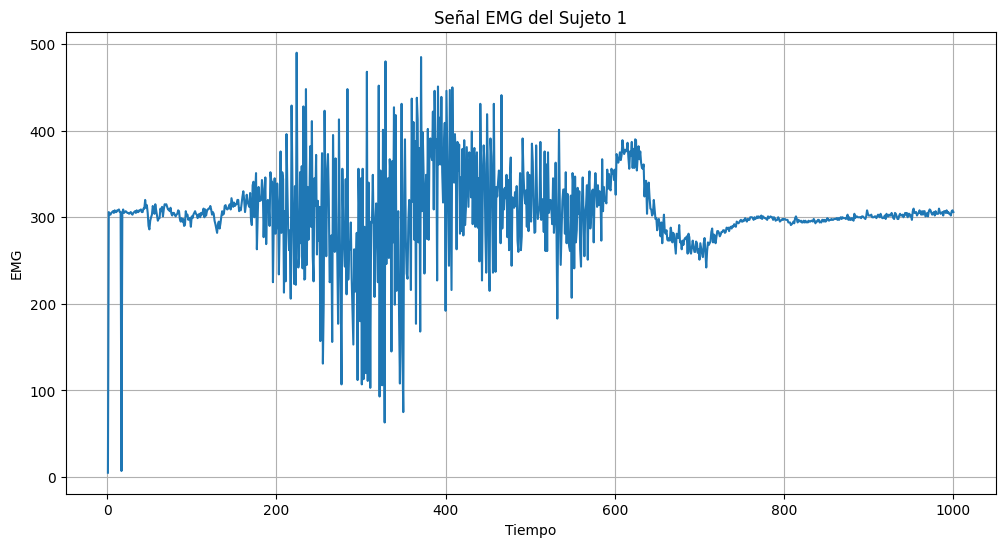

In [86]:
# Filtrar los datos del sujeto 1
df_sujeto1 = df_all[df_all['sujeto'] == 1]

# Graficar la señal EMG del sujeto 1
plt.figure(figsize=(12, 6))
plt.plot(df_sujeto1['tiempo'], df_sujeto1['EMG'])
plt.xlabel('Tiempo')
plt.ylabel('EMG')
plt.title('Señal EMG del Sujeto 1')
plt.grid(True)
plt.show()


In [87]:
# Crear un DataFrame vacío para almacenar los datos
df_sin = pd.DataFrame()

# Leer los archivos modificados y agregarlos al DataFrame
for registro in range(1, 11):  # Rango de registros del 1 al 17
    registro_folder = os.path.join('RegistrosSin', str(registro))
    archivo_modificado = os.path.join(registro_folder, 'datos_modificados.txt')
    df_registro = pd.read_csv(archivo_modificado, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)
    df_registro['sujeto'] = registro  # Asignar el número de sujeto
    df_sin = pd.concat([df_sin, df_registro], ignore_index=True)

# Reordenar las columnas para que coincidan con tu descripción
df_sin = df_sin[['tiempo', 'EMG', 'sujeto']]

C:\Users\ORMAN\AppData\Local\Temp\ipykernel_43548\4069802725.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_registro = pd.read_csv(archivo_modificado, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_43548\4069802725.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_registro = pd.read_csv(archivo_modificado, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_43548\4069802725.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_registro = pd.read_csv(archivo_modificado, header=0, names=['EMG', 'tiempo'], delim_whitespace=True)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_43548\40698

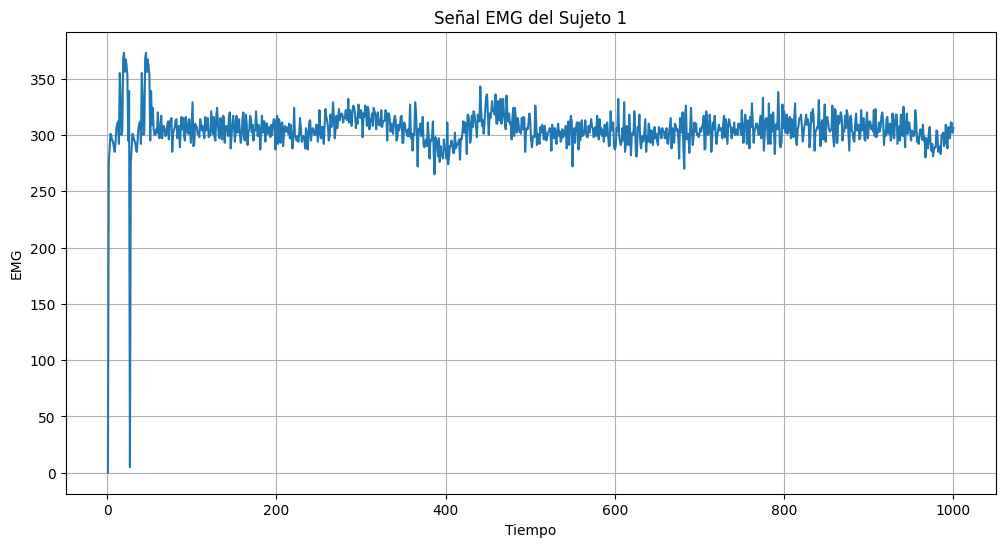

In [90]:
# Filtrar los datos del sujeto 1
df_sujeto1 = df_sin[df_sin['sujeto'] == 1]

# Graficar la señal EMG del sujeto 1
plt.figure(figsize=(12, 6))
plt.plot(df_sujeto1['tiempo'], df_sujeto1['EMG'])
plt.xlabel('Tiempo')
plt.ylabel('EMG')
plt.title('Señal EMG del Sujeto 1')
plt.grid(True)
plt.show()


In [91]:
# Función para aplicar el operador Teager-Kaiser Energy Operator (TKEO) a una señal
def tkeo(signal):
    tkeo_signal = signal**2 - np.roll(signal, 1) * np.roll(signal, -1)
    return tkeo_signal

In [92]:
def apply_tkeo(data):
    tkeo_data = data.copy()
    tkeo_data['EMG'] = tkeo(tkeo_data['EMG'])
    return tkeo_data

In [93]:
# Datos aplicando el operador
df_all_tkeo = apply_tkeo(df_all)
df_sin_tkeo = apply_tkeo(df_sin) 


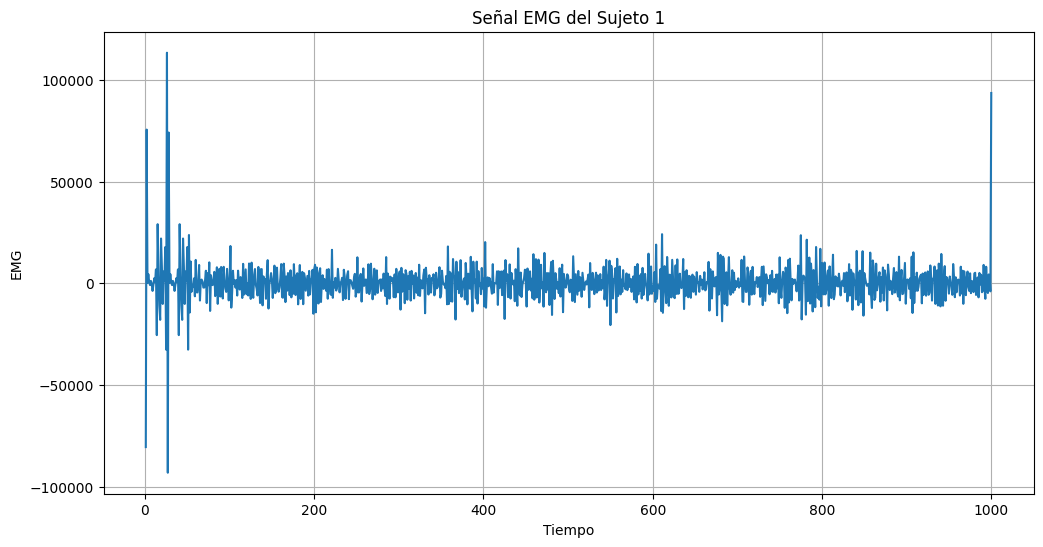

In [154]:
# Filtrar los datos del sujeto 1
df_sujeto1 = df_sin_tkeo[df_sin_tkeo['sujeto'] == 1]

# Graficar la señal EMG del sujeto 1
plt.figure(figsize=(12, 6))
plt.plot(df_sujeto1['tiempo'], df_sujeto1['EMG'])
plt.xlabel('Tiempo')
plt.ylabel('EMG')
plt.title('Señal EMG del Sujeto 1')
plt.grid(True)
plt.show()


Datos para señal con movimiento y sin TKEO


In [132]:
group = df_all.groupby('sujeto')

sujetos = []
for sujeto, data_frame in group:
    sujetos.append(data_frame.values)
sujeto1 = group.get_group(1)
sujeto2 = group.get_group(2)
sujeto3 = group.get_group(3)
sujeto4 = group.get_group(4)
sujeto5 = group.get_group(5)
sujeto6 = group.get_group(6)
sujeto7 = group.get_group(7)
sujeto8 = group.get_group(8) 
sujeto9 = group.get_group(9) 
sujeto10 = group.get_group(10) 

In [138]:
# Función para calcular diversas características de una señal EMG
def extract_features1(signal):
    rms = np.sqrt(np.mean(signal**2))
    variance = np.var(signal)
    mean_absolute_value = np.mean(np.abs(signal))
    mean_absolute_value_slope = np.mean(np.abs(np.diff(signal)))
    slope_sign_changes = np.sum(np.diff(np.sign(np.diff(signal))) != 0)
    wave_form_length = np.sum(np.abs(np.diff(signal)))
    zero_crossings = np.sum(np.diff(np.sign(signal)) != 0)/2

    return {
        'RMS': rms,
        'Variance': variance,
        'Mean Absolute Value': mean_absolute_value,
        'Mean Absolute Value Slope': mean_absolute_value_slope,
        'Slope Sign Changes': slope_sign_changes,
        'Wave Form Length': wave_form_length,
        'Zero Crossings': zero_crossings
    }

In [141]:
# Lista para almacenar los resultados de cada sujeto
results = []

# Iterar sobre cada grupo (sujeto) y aplicar la función extract_features1
for sujeto, data_frame in group:
    metrics = extract_features1(data_frame['EMG'])
    metrics['Sujeto'] = sujeto
    results.append(metrics)

# Convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(results)

# Reordenar las columnas
resultados_df = resultados_df[['Sujeto', 'RMS', 'Variance', 'Mean Absolute Value',
                                 'Mean Absolute Value Slope', 'Slope Sign Changes',
                                 'Wave Form Length', 'Zero Crossings']]

resultados_df

,Sujeto,RMS,Variance,Mean Absolute Value,Mean Absolute Value Slope,Slope Sign Changes,Wave Form Length,Zero Crossings
0,1,308.929602,2660.603351,304.593,38.695696,709,38657.0,0.0
1,2,308.594550,2208.035984,304.996,39.005005,663,38966.0,0.5
2,3,307.505467,1735.803100,304.670,29.325325,655,29296.0,0.0
3,4,308.717844,2416.468159,304.779,39.443443,652,39404.0,0.0
4,5,308.513201,2104.758111,305.083,37.433433,669,37396.0,0.0
5,6,307.118871,1873.774191,304.053,38.304304,668,38266.0,1.5
6,7,307.891150,1494.813884,305.454,31.861862,676,31830.0,0.0
7,8,307.423825,859.943516,306.022,18.889890,736,18871.0,0.0
8,9,306.509564,1018.858351,304.843,25.501502,723,25476.0,1.0
9,10,307.940806,1452.070524,305.574,32.186186,650,32154.0,0.0


DATOS CON MOVIMIENTO Y CON TKEO

In [146]:
group_tkeo = df_all_tkeo.groupby('sujeto')

sujetos = []
for sujeto, data_frame in group_tkeo:
    sujetos.append(data_frame.values)
sujeto1 = group_tkeo.get_group(1)
sujeto2 = group_tkeo.get_group(2)
sujeto3 = group_tkeo.get_group(3)
sujeto4 = group_tkeo.get_group(4)
sujeto5 = group_tkeo.get_group(5)
sujeto6 = group_tkeo.get_group(6)
sujeto7 = group_tkeo.get_group(7)
sujeto8 = group_tkeo.get_group(8) 
sujeto9 = group_tkeo.get_group(9) 
sujeto10 = group_tkeo.get_group(10) 

In [147]:
# Lista para almacenar los resultados de cada sujeto
results = []

# Iterar sobre cada grupo (sujeto) y aplicar la función extract_features1
for sujeto, data_frame in group_tkeo:
    metrics = extract_features1(data_frame['EMG'])
    metrics['Sujeto'] = sujeto
    results.append(metrics)

# Convertir la lista de resultados en un DataFrame
resultados_df_takeo = pd.DataFrame(results)

# Reordenar las columnas
resultados_df_takeo = resultados_df_takeo[['Sujeto', 'RMS', 'Variance', 'Mean Absolute Value',
                                 'Mean Absolute Value Slope', 'Slope Sign Changes',
                                 'Wave Form Length', 'Zero Crossings']]

resultados_df_takeo

,Sujeto,RMS,Variance,Mean Absolute Value,Mean Absolute Value Slope,Slope Sign Changes,Wave Form Length,Zero Crossings
0,1,39245.572520,1.535350e+09,20703.611,37999.822823,754,37961823.0,358.0
1,2,38267.365348,1.460069e+09,20573.025,37842.554555,763,37804712.0,357.0
2,3,23897.695003,5.698643e+08,15091.982,27386.006006,740,27358620.0,350.0
3,4,34559.094393,1.188561e+09,20560.960,36542.446446,735,36505904.0,346.0
4,5,38430.253831,1.471774e+09,19772.903,36494.886887,743,36458392.0,355.0
5,6,33567.641785,1.122811e+09,20110.202,36059.153153,729,36023094.0,350.5
6,7,30603.873899,9.343741e+08,17045.808,31160.456456,758,31129296.0,362.0
7,8,20617.317141,4.245019e+08,10254.191,18811.095095,770,18792284.0,368.5
8,9,22542.947690,5.074921e+08,14108.671,25576.556557,780,25550980.0,375.5
9,10,26817.592758,7.172025e+08,16712.451,29955.667668,730,29925712.0,349.5


Datos Sin Movimiento y Sin TKEO

In [148]:
group_sin = df_sin.groupby('sujeto')

sujetos = []
for sujeto, data_frame in group_sin:
    sujetos.append(data_frame.values)
sujeto1 = group_sin.get_group(1)
sujeto2 = group_sin.get_group(2)
sujeto3 = group_sin.get_group(3)
sujeto4 = group_sin.get_group(4)
sujeto5 = group_sin.get_group(5)
sujeto6 = group_sin.get_group(6)
sujeto7 = group_sin.get_group(7)
sujeto8 = group_sin.get_group(8) 
sujeto9 = group_sin.get_group(9) 
sujeto10 = group_sin.get_group(10) 

In [150]:
# Lista para almacenar los resultados de cada sujeto
results = []

# Iterar sobre cada grupo (sujeto) y aplicar la función extract_features1
for sujeto, data_frame in group_sin:
    metrics = extract_features1(data_frame['EMG'])
    metrics['Sujeto'] = sujeto
    results.append(metrics)

# Convertir la lista de resultados en un DataFrame
resultados_df_sin = pd.DataFrame(results)

# Reordenar las columnas
resultados_df_sin= resultados_df_sin[['Sujeto', 'RMS', 'Variance', 'Mean Absolute Value',
                                 'Mean Absolute Value Slope', 'Slope Sign Changes',
                                 'Wave Form Length', 'Zero Crossings']]

resultados_df_sin

,Sujeto,RMS,Variance,Mean Absolute Value,Mean Absolute Value Slope,Slope Sign Changes,Wave Form Length,Zero Crossings
0,1,305.738395,353.340400,305.160,11.837838,647,11826.0,0.5
1,2,305.573301,259.740096,305.148,11.619620,633,11608.0,0.5
2,3,305.613189,200.489775,305.285,11.276276,637,11265.0,0.0
3,4,305.183717,319.994719,304.659,11.991992,617,11980.0,0.5
4,5,305.492851,336.258636,304.942,15.377377,619,15362.0,0.0
5,6,305.068546,314.897296,304.552,13.425425,618,13412.0,1.5
6,7,305.339095,325.874975,304.805,12.217217,633,12205.0,0.5
7,8,306.236330,366.102956,305.638,13.423423,623,13410.0,2.0
8,9,304.790974,268.615500,304.350,13.954955,621,13941.0,0.0
9,10,305.696012,333.529500,305.150,14.389389,612,14375.0,0.0


DATOS SIN MOV. Y CON TKEO

In [151]:
group_sin_tkeo = df_sin_tkeo.groupby('sujeto')

sujetos = []
for sujeto, data_frame in group_sin_tkeo:
    sujetos.append(data_frame.values)
sujeto1 = group_sin_tkeo.get_group(1)
sujeto2 = group_sin_tkeo.get_group(2)
sujeto3 = group_sin_tkeo.get_group(3)
sujeto4 = group_sin_tkeo.get_group(4)
sujeto5 = group_sin_tkeo.get_group(5)
sujeto6 = group_sin_tkeo.get_group(6)
sujeto7 = group_sin_tkeo.get_group(7)
sujeto8 = group_sin_tkeo.get_group(8) 
sujeto9 = group_sin_tkeo.get_group(9) 
sujeto10 = group_sin_tkeo.get_group(10) 

In [152]:
# Lista para almacenar los resultados de cada sujeto
results = []

# Iterar sobre cada grupo (sujeto) y aplicar la función extract_features1
for sujeto, data_frame in group_sin_tkeo:
    metrics = extract_features1(data_frame['EMG'])
    metrics['Sujeto'] = sujeto
    results.append(metrics)

# Convertir la lista de resultados en un DataFrame
resultados_df_sin_tkeo = pd.DataFrame(results)

# Reordenar las columnas
resultados_df_sin_tkeo= resultados_df_sin_tkeo[['Sujeto', 'RMS', 'Variance', 'Mean Absolute Value',
                                 'Mean Absolute Value Slope', 'Slope Sign Changes',
                                 'Wave Form Length', 'Zero Crossings']]

resultados_df_sin_tkeo

,Sujeto,RMS,Variance,Mean Absolute Value,Mean Absolute Value Slope,Slope Sign Changes,Wave Form Length,Zero Crossings
0,1,10018.641042,1.002775e+08,6098.735,10619.552553,720,10608933.0,334.5
1,2,8849.770017,7.826865e+07,6005.867,10312.686687,715,10302374.0,338.0
2,3,8812.830251,7.760713e+07,5819.104,9856.757758,726,9846901.0,341.5
3,4,9839.161897,9.672106e+07,5986.594,10212.392392,696,10202180.0,327.5
4,5,11461.860982,1.312076e+08,7615.442,13082.074074,695,13068992.0,328.5
5,6,10565.991595,1.115280e+08,6664.998,11460.912913,697,11449452.0,332.0
6,7,9823.002011,9.644258e+07,6095.671,10554.055055,706,10543501.0,329.0
7,8,10944.579378,1.196626e+08,6613.060,11530.318318,686,11518788.0,326.0
8,9,10224.923232,1.043952e+08,6887.059,11790.861862,694,11779071.0,325.5
9,10,11160.533783,1.244222e+08,7230.825,12612.997998,697,12600385.0,338.5
